In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt

#<img src="pixels.jpg" width="500">

In [2]:
#ABCD ray trace function
def ABCD_trace(a,zf, zf_type):
    #a: starting vector a=np.array([[height],[angle]])
    #zf: free space and lens focal lengths
    #zf_type: type of optical element ('z' for free space, 'f' for lens)
    #return matrix of y, z

    #check to make sure the passed arrays match in length
    if np.size(zf) != len(zf_type):
        print("zf and zf_type arrays do not match")
        return None

    trace=np.array([[a[0,0]], [0]])
    for ind in range(len(zf_type)):

        if zf_type[ind] == 'z':
            #free space propagation
            M1 = np.array([[1.0, zf[ind]], [0.0, 1.0]])
            a=M1@a
            #add new point to trace matrix
            y=a[0,0]
            z=trace[1, -1]+zf[ind]
            new_point = np.array([[y], 
                                  [z]])
            # Append column-wise
            trace = np.hstack((trace, new_point))
            
        elif zf_type[ind] == 'f':
            #free space propagation
            M1 = np.array([[1.0, 0.0], [-1/zf[ind], 1.0]])
            a=M1@a
            #Don't append to the trace
            #No ray travel

        else:
            print("Invalid zf_type")
            return None
    return trace

# Principal Planes

Most optical systems consists of multiple lenses.  For a camera system we want to model the lens system as a single equivalent lens.  We can do this using a concept called principal planes.  In essence principal planes are imaginary reference planes used to simplify a thick or multi-element optical system so that it can be treated as an equivalent thin lens.  

## Procedure
1. Trace a **parallel ray** through the system from left to right (Object space to Image space).
2. Plot the parallel ray projection (red dashed line)
3. From the focus (Image space) plot the ray projection (blue dashed lined)

In an ideal single lens system all of the ray bending occurs at the thin lens.  This thin lens is defined as the crossing point between the parallel ray projection (from object space) and the projected focal ray (image space).  This crossing plane is labeled as **P'**. This is the image space principal plane. In addition, the distance from the focus to the P' plane is the **effective focal length of the system (EFL)**

Key distances:
- **EFL**: Effective focal length  
- **P′**: Principal planes




<img src="pp1.jpg" width="500">

Repeat the same thing from the image space to the object space.

4. Trace a **parallel ray** through the system from right to left (Image space to Object space).
2. Plot the parallel ray projection (red dashed line)
3. From the focus (Object space) plot the ray projection (blue dashed lined)

In an ideal single lens system all of the ray bending occurs at the thin lens.  This thin lens is defined as the crossing point between the parallel ray projection (from object space) and the projected focal ray (image space).  This crossing plane is labeled as **P**. This is the object space principal plane. In addition, the distance from the focus to the P plane is the **effective focal length of the system (EFL)**.  Optical systems are reciprocal.  So, the EFL from Object space to Image space should be the same as from Image space to Object space.

Key distances:
- **EFL**: Effective focal length  
- **P′**: Principal planes

<img src="pp2.jpg" width="500">

Here is the combined image showing both the P and P' planes.

<img src="pp.jpg" width="500">

## Ray Tracing via Principal Planes

1. Trace the rays from the object to the **P plane** (object space principal plane).
2. Shift the ray to **P′** (image space principal plane) and continue tracing.


# Practice

Multi-Lens Example: $S_o=20$, $f_1=10$, $f_2=20$, and $d=50$

(1) Trace forward ray use ABCD matrices.  

$$
M =
\begin{pmatrix}
1 & 0 \\
-\frac{1}{20} & 1
\end{pmatrix}
\begin{pmatrix}
1 & 50 \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 & 0 \\
-\frac{1}{10} & 1
\end{pmatrix}.
$$

In [ ]:
f1=10
f2=20
d=50
M1=np.array([[1, 0], [-1/f1, 1]])
M2=np.array([[1, d], [0, 1]])
M3=np.array([[1, 0], [-1/f2, 1]])

Mtot=M3@M2@M1
print(Mtot)

[[-4.  50. ]
 [ 0.1 -1.5]]


Parallel Ray Trace
$$
a_2=\begin{pmatrix}
-4 & 50 \\
0.1 & -1.5
\end{pmatrix}
\begin{pmatrix}
1 \\
0\end{pmatrix}
$$

In [ ]:
a1=np.array([[1], [0]])
a2=Mtot@a1
print(a2)

[[-4. ]
 [ 0.1]]


$$
a_2=
\begin{pmatrix}
-4 \\
0.1\end{pmatrix}
$$

This ray is at the surface of the second lens.  We propagate this ray to the point where it crosses the optical axis of the system. 

In [ ]:
height=a2[0,0]
angle=a2[1,0]
L2= -height/angle
L1=L2+d
print("height: ", height, "angle: ",  angle)
print("Distance from lens 2 to focus: ", L2)
print("Distance from lens 1 to focus: ", L1)


height:  -4.0 angle:  0.1
Distance from lens 2 to focus:  40.0
Distance from lens 1 to focus:  90.0


At the second lens the ray has a height of -4 and is travel up at a rate of 0.1.  The focal spot is 40 to the left of the second lens or 90 to left of the first lens.  Now we project this ray until it reaches the the incoming parallel ray.  We chose the parallel ray to have a height of 1. From the focal point to the ray height of 1 is the effective focal length (EFL) of the optical system.

In [ ]:
Pp=(1-height)/(angle)
print("P': ", Pp)
EFL=L2-Pp
print("EFL: ", EFL)

P':  50.0
EFL:  -10.0


The **P'** plane (image space plane) is 50 to the right of the second lens or 100 to the right of the first lens. The P' plane is on the right side of the focal spot.  This means that the EFL is negative.  The EFL is $50-40=10$.

Here is the plot of the rays for illustration.

y1:  [ 1.  1. -4.  1.]
z1:  [  0.  10.  60. 110.]


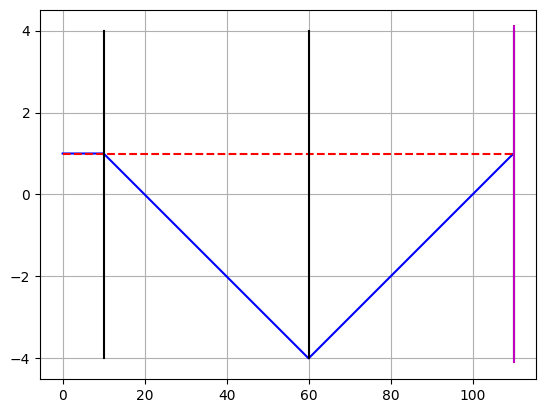

In [ ]:
f1=10
f2=20
d=50

zf=np.array([10, f1, d, f2, 50])  #free space and lens focal lengths
zf_type=['z', 'f', 'z', 'f', 'z']

th1=0
a=np.array([[1.0], [th1]])  
trace=ABCD_trace(a,zf, zf_type)
z1=trace[1,:]
y1=trace[0,:]
print("y1: ", y1)
print("z1: ", z1)

plt.plot(z1, y1, 'b')
plt.plot([0,110], [1,1], 'r--')

z=0
for index,  txt in enumerate(zf_type):
    if txt == 'z':
        z=z+zf[index]
        plt.plot([z, z], [-4, 4], 'k')

plt.plot([110, 110], [-4.1,4.1], 'm')
plt.grid(True)
plt.show()

Now we do the back propagating ray.  

(2) Trace backwards ray use ABCD matrices

$$
M =
\begin{pmatrix}
1 & 0 \\
-\frac{1}{10} & 1
\end{pmatrix}
\begin{pmatrix}
1 & 50 \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 & 0 \\
-\frac{1}{20} & 1
\end{pmatrix}
\begin{pmatrix}
1 \\
0
\end{pmatrix}
$$

In [ ]:
a3=np.array([[1], [0]])
f1=10
f2=20
d=50
M1=np.array([[1, 0], [-1/f1, 1]])
M2=np.array([[1, d], [0, 1]])
M3=np.array([[1, 0], [-1/f2, 1]])

a4=M1@M2@M3@a3
print(a4)

[[-1.5]
 [ 0.1]]


Notice that the magnitude of the angle is the same as the forward propagating ray.  This should always be the case.  It means that the EFL is the same for the forward and backward propagating rays.  

In [ ]:
L3=a4[0,0]/(-a4[1,0])
P=(1-a4[0,0])/(a4[1,0])
EFL2=L3-P
print("Distance from first lens to focus: ", L3)
print("P: ", P)
print("EFL: ", EFL2)


Distance from first lens to focus:  15.000000000000002
P:  25.0
EFL:  -9.999999999999998


The distance from the first lens surface to the focal plane is 15 to the left of the first lens.  The **P** plane is 25 to the left of the first lens and EFL=-10.

Ray plot showing the back propagating ray. 

y:  [ 1.  -1.5  1.   1. ]
z:  [ 0. 25. 75. 85.]


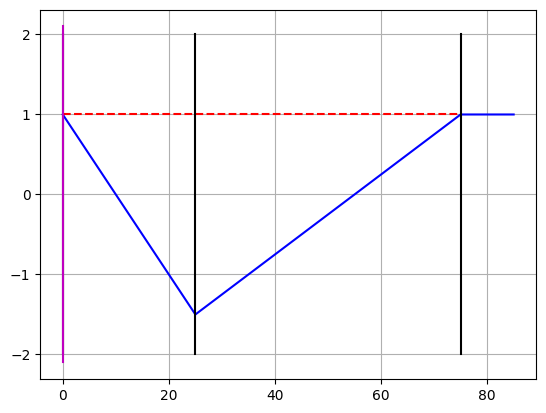

In [ ]:
f1=10
d=50
f2=20

#We are tracing from the left to the right
# (1) flip around the order of the lenses
# (2) subtract z from total distance

zf=np.array([10, f2, d, f1, 25])  #free space and lens focal lengths
zf_type=['z', 'f', 'z', 'f', 'z']

th1=0
a=np.array([[1.0], [th1]])  
trace=ABCD_trace(a,zf, zf_type)
z1=trace[1,:]
y1=trace[0,:]

#(1) flip around the order
z1=np.flip(z1)
y1=np.flip(y1)
#(2) subtract z from total distance
z1=85-z1
print("y: ", y1)
print("z: ", z1)

plt.plot(z1, y1, 'b')
plt.plot([0, 75], [1,1], 'r--'   )

z=0
for index,  txt in enumerate(zf_type):
    if txt == 'z':
        z=z+zf[index]
        plt.plot([85-z, 85-z], [-2, 2], 'k')

plt.plot([0,0], [-2.1, 2.1], 'm')
plt.grid(True)
plt.show()

**Summary**:
- EFL=-10
- P: 25 to the left of lens 1
- P': 100 to right of lens 1

Now we are ready for the ray trace.  The object distance is the distance from the object to the first lens. $\left( S_o=20 \right)$.  But now everything is referenced to the principal planes.  $S_o$ is now referenced to the object space principal plane (P).  

Relative to the P plane. $So=20-25=-5$.  Use the conjugate equation.

In [ ]:
So=20-25
EFL=-10
#1/4.4+1/Si=1/EFL
Si=1/(1/EFL-1/So)
print("Si: ", Si)

Si:  10.0


$S_i$ is referenced to the image space principal plane.  We jump to the **P'** plane and the image is 10 to the right of the **P'** plane.  The P' plane is 100 to the right of lens 1. Relative to lens 1 this is $10+100=110$ to the right of the first lens.  If we reference the image to lens 2 then the image is 60 to the right of the second lens.

Let's check this against the conjugate equation approach.

In [ ]:
So1=20
f1=10
d=50
f2=20

Si1=(1/f1-1/So1)**(-1)
print("Distance to intermediary image relative to first lens, Si1: ", Si1)
So2=d-Si1
print("Object distance relative to second lens, So2: ", So2)
Si2=(1/f2-1/So2)**(-1)    
print("Distance to image from second lens, Si2: ", Si2)

Distance to intermediary image relative to first lens, Si1:  20.0
Object distance relative to second lens, So2:  30.0
Distance to image from second lens, Si2:  59.999999999999986


(3) Using ABCD Matrices

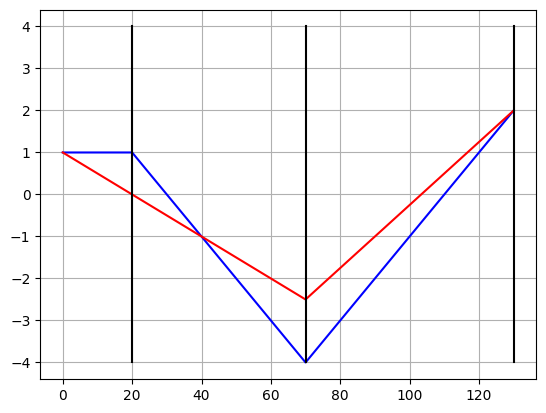

In [ ]:
So=20
f1=10
d=50
f2=20


zf=np.array([So, f1, d, f2, 60])  #free space and lens focal lengths
zf_type=['z', 'f', 'z', 'f', 'z']

th1=0
a=np.array([[1.0], [th1]])  
trace=ABCD_trace(a,zf, zf_type)
z1=trace[1,:]
y1=trace[0,:]

th2=-.05
a=np.array([[1.0], [th2]])  
trace=ABCD_trace(a,zf, zf_type)
z2=trace[1,:]
y2=trace[0,:]

plt.plot(z1, y1, 'b')
plt.plot(z2, y2, 'r')

z=0
for index,  txt in enumerate(zf_type):
    if txt == 'z':
        z=z+zf[index]
        plt.plot([z, z], [-4, 4], 'k')

plt.grid(True)
plt.show()
      

Here is an illustration of the ray trace.  Process:
- trace to the object plane (P)
- jump to the image plane (P') and finish the trace

<img src="pp_example.jpg" width="800">

<div style="border:4px solid red">

**HW1:** You are designing a super-telephoto lens.  The focal length needs to be EFL=400mm.  This is too long of a lens to be practical because with an ideal lens that mean that the CCD needs to be 400mm away from the lens.  You are told that the camera needs to have a EFL=400mm but a total throw of 100mm.  You can do this using a lens system that is a positive lens and a negative lens.  Create the design.  You want to do the design using the concepts of principal planes.  The design is the focal lengths and the separation.  (Use hw6_1A: focal length of first lens, hw6_1B: lens separation, and hw6_1C: focal length of second lens.)

In [ ]:
# Telephoto lens design problem
# Given:
# - EFL (effective focal length) = 400mm
# - BFL (back focal length, throw) = 100mm
# - Need: f1 (positive lens), f2 (negative lens), d (separation)

# For a two-lens system:
# EFL = f1*f2 / (f1 + f2 - d)
# BFL = EFL * (d - f1) / f2

# For a telephoto design: f1 > 0 (converging), f2 < 0 (diverging)
# This gives BFL < EFL (compact design)

# From the two equations, we can solve for the lens parameters
# Let's use a systematic approach with scipy to solve

from scipy.optimize import fsolve

EFL = 400  # mm
BFL = 100  # mm

def equations(vars):
    f1, f2, d = vars
    # Equation 1: EFL formula
    eq1 = (f1 * f2) / (f1 + f2 - d) - EFL
    # Equation 2: BFL formula
    eq2 = EFL * (d - f1) / f2 - BFL
    # Equation 3: Let's set d = f1 - 50 for a reasonable telephoto design
    # This ensures the negative lens is close to the focal point of the positive lens
    eq3 = d - (f1 - 50)
    return [eq1, eq2, eq3]

# Initial guess: f1=450, f2=-150, d=400
initial_guess = [450, -150, 400]
solution = fsolve(equations, initial_guess)

f1, f2, d = solution

print(f"Solution found:")
print(f"f1 = {f1:.2f} mm (first lens, positive)")
print(f"f2 = {f2:.2f} mm (second lens, negative)")
print(f"d = {d:.2f} mm (separation)")

# Verify the solution
EFL_check = (f1 * f2) / (f1 + f2 - d)
BFL_check = EFL_check * (d - f1) / f2

print(f"\nVerification:")
print(f"EFL = {EFL_check:.2f} mm (should be 400mm)")
print(f"BFL = {BFL_check:.2f} mm (should be 100mm)")

# Store the answers
hw6_1A = f1  # focal length of first lens
hw6_1B = d   # lens separation  
hw6_1C = f2  # focal length of second lens

print(f"\n=== DESIGN RESULTS ===")
print(f"hw6_1A (f1, first lens): {hw6_1A:.2f} mm")
print(f"hw6_1B (d, separation): {hw6_1B:.2f} mm")
print(f"hw6_1C (f2, second lens): {hw6_1C:.2f} mm")

With d = 350mm:
f2 = 200.0mm
f1 = 300.0mm

Verification:
EFL = 400.0mm (should be 400mm)
BFL = 100.0mm (should be 100mm)

=== DESIGN RESULTS ===
hw6_1A (f1, first lens): 300.0 mm
hw6_1B (d, separation): 350 mm
hw6_1C (f2, second lens): 200.0 mm


<div style="border:4px solid red">

**HW2:** For the previous problem calculate the location of the **P'** principal plane relative to the first lens.  Negative means that the principal plane is in front of the lens.  (Use hw6_2.)

<div style="border:4px solid red">

**HW3:** For the previous problem calculate the location of the **P** principal plane relative to the first lens.  Negative means that the principal plane is in from of the lens.  (Use hw6_3.)

<div style="border:4px solid red">

**HW4:** A lens system is constructed with the following lenses.  Lens 1 has focal length of f1=100mm, the separation between lens 1 and lens 2 is d12=120mm, lens 2 has a focal length of f2=20mm, the separation between lens 2 and lens 3 is d23=10mm, and lens 3 has a focal length of f3=50mm. What is the effective focal length (EFL) of the system? (Use variable hw6_4.)

<div style="border:4px solid red">

**HW5:** A lens system is constructed with the following lensesm.  Lens 1 has focal length of f1=100mm, the separation between lens 1 and lens 2 is d12=120mm, lens 2 has a focal length of f2=20mm, the separation between lens 2 and lens 3 is d23=10mm, and lens 3 has a focal length of f3=50mm. What is distance between the first lens and the image principal plane (P')? (Use variable hw6_5.)

In [ ]:
#CODE

<div style="border:4px solid red">

**HW6:** A lens system is constructed with the following lensesm.  Lens 1 has focal length of f1=100mm, the separation between lens 1 and lens 2 is d12=120mm, lens 2 has a focal length of f2=20mm, the separation between lens 2 and lens 3 is d23=10mm, and lens 3 has a focal length of f3=50mm. What is distance between the first lens and the object principal plane (P)? (Use variable hw6_6.)

<div style="border:4px solid red">

**HW7:** A lens system is constructed with the following lensesm.  Lens 1 has focal length of f1=100mm, the separation between lens 1 and lens 2 is d12=120mm, lens 2 has a focal length of f2=20mm, the separation between lens 2 and lens 3 is d23=10mm, and lens 3 has a focal length of f3=50mm. Using principal planes find the image location? (Use variable hw6_7.)

<div style="border:4px solid red">

**HW8:** A camera lens is constructed with the following lens system.  Lens 1 has focal length of f1=100mm, the separation between lens 1 and lens 2 is d12=120mm, lens 2 has a focal length of f2=20mm, the separation between lens 2 and lens 3 is d23=10mm, lens 3 has a focal length of f3=50mm, and the CCD has a width of 10mm. What is the effective focal length (EFL) of the camera? (Use variable hw6_8.)

z:  0.01
z:  0.13
z:  0.14
z:  0.15000000000000002


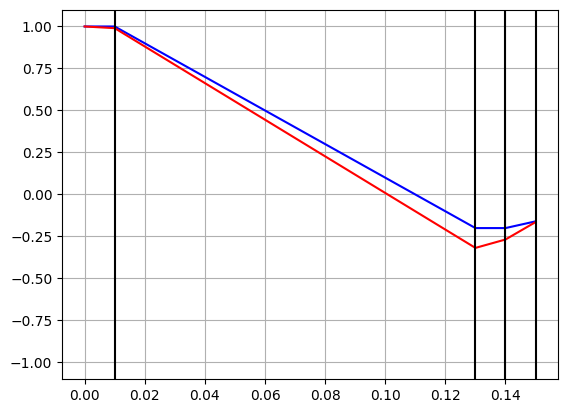

<div style="border:4px solid red">

**HW9:** A camera lens is constructed with the following lens system.  Lens 1 has focal length of f1=100mm, the separation between lens 1 and lens 2 is d12=120mm, lens 2 has a focal length of f2=20mm, the separation between lens 2 and lens 3 is d23=10mm, lens 3 has a focal length of f3=50mm, and the CCD has a width of 10mm.What is the field of view (FOV) of the camera? (Use variable hw6_9.)

FOV:  -2.29183118052329  degrees
